In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from scipy.stats import jarque_bera
from sklearn.metrics import r2_score
import warnings

from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

warnings.filterwarnings('ignore')
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [20,8]
# lags=60
# precent_train_set = 0.9
# rolling_value = 10


In [2]:
df_1 = pd.read_csv('../../data_dm/eugen/FB.csv', header=0, index_col=0, parse_dates=True)
df_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2021-02-24,262.329987,266.380005,258.390015,264.309998,264.309998,15736100
2021-02-25,262.299988,266.940002,254.039993,254.690002,254.690002,19053100
2021-02-26,256.470001,265.549988,256.470001,257.619995,257.619995,26593900


In [3]:
df_1 = pd.read_csv('../../data_dm/eugen/NFLX.csv', header=0, index_col=0, parse_dates=True)
df_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2021-02-24,539.799988,556.849976,539.070007,553.409973,553.409973,3245000
2021-02-25,550.270020,556.479980,535.750000,546.700012,546.700012,4252900
2021-02-26,546.510010,553.090027,538.000000,538.849976,538.849976,3754600


In [4]:
df_1 = pd.read_csv('../../data_dm/eugen/gdp_poland.csv', header=0, index_col=0, parse_dates=True)
df_1

,gdp
Data,
1990-01-01,6.597775e+10
1991-01-01,8.550094e+10
1992-01-01,9.433705e+10
1993-01-01,9.604565e+10
1994-01-01,1.108034e+11
1995-01-01,1.422928e+11
1996-01-01,1.601932e+11
1997-01-01,1.593578e+11
1998-01-01,1.746858e+11


In [5]:
df = pd.read_csv('../../data_dm/eugen/gdp_ukraine.csv', header=0, index_col=0, parse_dates=True)
df

,gdp
date,
1987-01-01,6.408769e+10
1988-01-01,7.470352e+10
1989-01-01,8.270916e+10
1990-01-01,8.145692e+10
1991-01-01,7.746456e+10
1992-01-01,7.394224e+10
1993-01-01,6.564856e+10
1994-01-01,5.254956e+10
1995-01-01,4.821387e+10


# GDP Ukraine

In [6]:
df = pd.read_csv('../../data_dm/eugen/gdp_ukraine.csv', header=0, index_col=0, parse_dates=True)
df = df / 1e+10

df

,gdp
date,
1987-01-01,6.408769
1988-01-01,7.470352
1989-01-01,8.270916
1990-01-01,8.145692
1991-01-01,7.746456
1992-01-01,7.394224
1993-01-01,6.564856
1994-01-01,5.254956
1995-01-01,4.821387


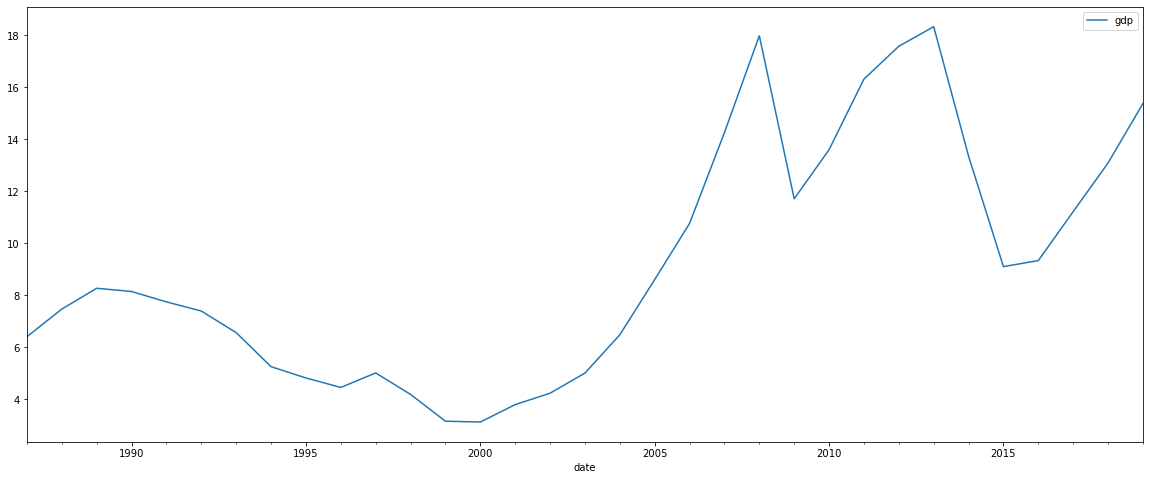

In [7]:
df.plot()

## Decompose data

In [8]:
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

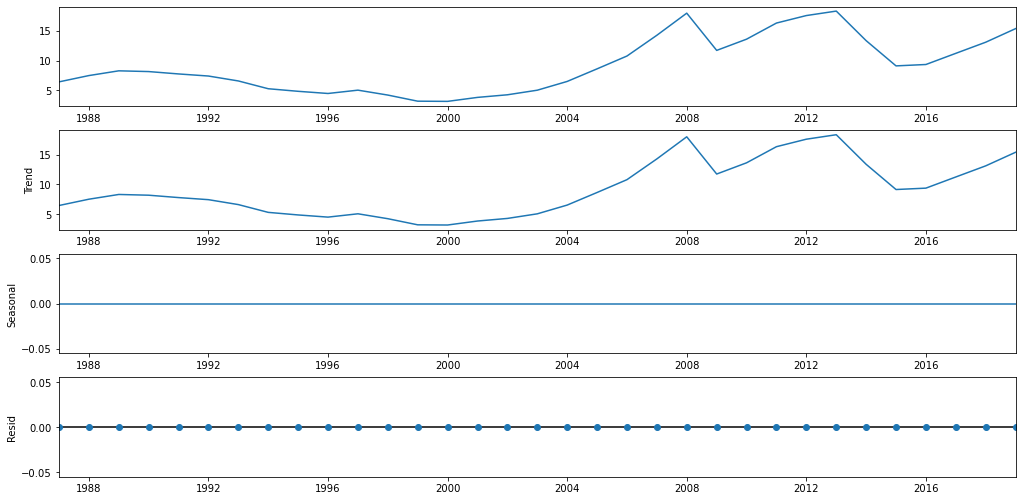

In [9]:
seasonal_decompose(df)

In [10]:
y = df

## Checking Stationarity (do not work for gdp)

In [11]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=rolling_value).mean() 
    rolstd = pd.Series(timeseries).rolling(window=rolling_value).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

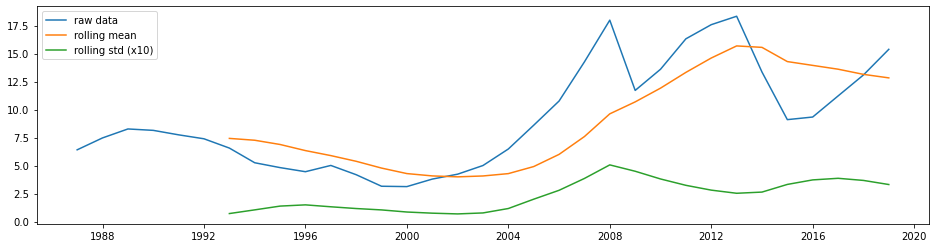

In [12]:
rolling_value = 7

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y.gdp,'raw data')

## Augmented Dickey-Fuller Test

In [13]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [14]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.058
P-value = 0.731
Critical values :
	1%: -3.653519805908203 - The data is not stationary with 99% confidence
	5%: -2.9572185644531253 - The data is not stationary with 95% confidence
	10%: -2.6175881640625 - The data is not stationary with 90% confidence


## Detrending

In [15]:
rolling_value = 3


 > Is the de-trended data stationary ?
Test statistic = -2.858
P-value = 0.051
Critical values :
	1%: -3.6790595944893187 - The data is not stationary with 99% confidence
	5%: -2.9678817237279103 - The data is not stationary with 95% confidence
	10%: -2.6231583472057074 - The data is  stationary with 90% confidence


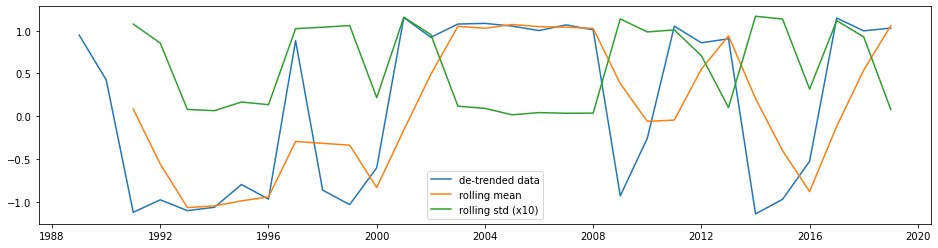

In [16]:
# Detrending
y_detrend =  (y - y.rolling(window=rolling_value).mean())/y.rolling(window=rolling_value).std()

test_stationarity(y_detrend.gdp,'de-trended data')
ADF_test(y_detrend,'de-trended data')

## Differencing

 > Is the 1 lag differenced data stationary ?
Test statistic = -4.304
P-value = 0.000
Critical values :
	1%: -3.661428725118324 - The data is  stationary with 99% confidence
	5%: -2.960525341210433 - The data is  stationary with 95% confidence
	10%: -2.6193188033298647 - The data is  stationary with 90% confidence


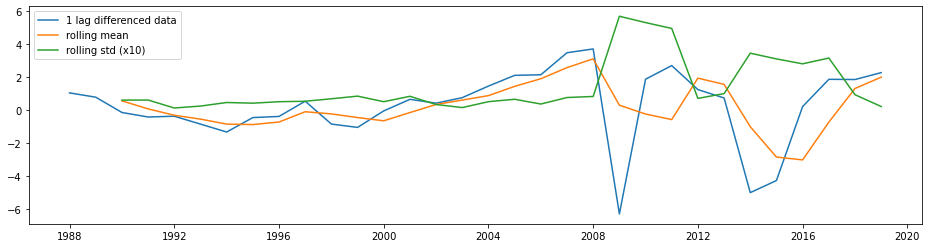

In [17]:
# Differencing
diff_model = 1
y_10lag =  y - y.shift(diff_model)

test_stationarity(y_10lag.gdp,f'{diff_model} lag differenced data')
ADF_test(y_10lag,f'{diff_model} lag differenced data')

## Combining Detrending and Differencing


 > Is the 1 lag differenced de-trended data stationary ?
Test statistic = -5.054
P-value = 0.000
Critical values :
	1%: -3.6996079738860943 - The data is  stationary with 99% confidence
	5%: -2.9764303469999494 - The data is  stationary with 95% confidence
	10%: -2.627601001371742 - The data is  stationary with 90% confidence


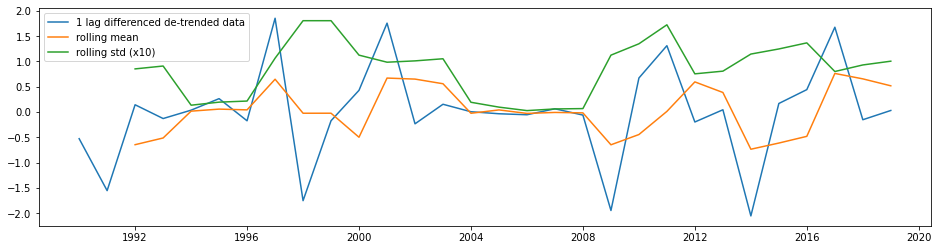

In [18]:
y_10lag_detrend =  y_detrend - y_detrend.shift(diff_model)

test_stationarity(y_10lag_detrend.gdp,f'{diff_model} lag differenced de-trended data')
ADF_test(y_10lag_detrend.gdp,f'{diff_model} lag differenced de-trended data')

## Create Training & Testing Datasets


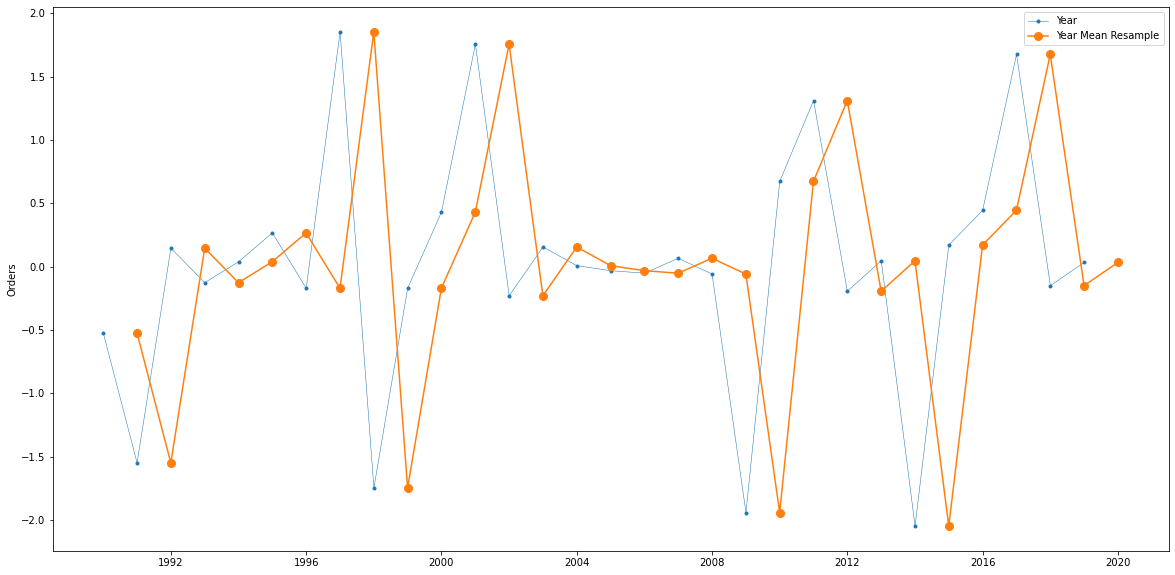

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(y_10lag_detrend,marker='.', linestyle='-', linewidth=0.5, label='Year')
ax.plot(y_10lag_detrend.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Year Mean Resample')
ax.set_ylabel('Orders')
ax.legend();

In [20]:
def calculate_metrics_sample(y):
   
    print('yes')
    sample = pd.Series(y)
    
    y_dict = dict()

#     y_dict['series'] = 'Y'
    
    y_dict['observations'] = sample.size
    y_dict['mode'] = sample.mode()[0]
    y_dict['mean'] = sample.mean()
    y_dict['median'] = sample.median()
    y_dict['variation'] = sample.var()
    y_dict['skewness'] = sample.skew()
    y_dict['kurtosis'] = sample.kurt()
    y_dict['jarque-bera'] = jarque_bera(sample).statistic
    y_dict['probability'] = jarque_bera(sample).pvalue
    
    return pd.DataFrame(np.array([[metr] for metr in y_dict.values()]).T, 
                        columns=[ 'observations', 'mode','mean','median',
                                 'variation','skewness','kurtosis','jarque-bera','probability']).astype('float16')#,'params_ar','params_intercept'])

## Metrics

In [21]:
# columns =['name', 'r2', 'RMSE','MAE','sum_squared_resid','AIC','durbin_watson','theil_index']

# models_metrics_static = pd.DataFrame(columns=columns)
# models_metrics_static_test = pd.DataFrame(columns=columns)

calculate_metrics_sample(y.gdp)

yes


,observations,mode,mean,median,variation,skewness,kurtosis,jarque-bera,probability
0,33.00000000,3.12695312,9.15625000,8.14843750,21.46875000,0.58789062,-0.81152344,2.77343750,0.25000000


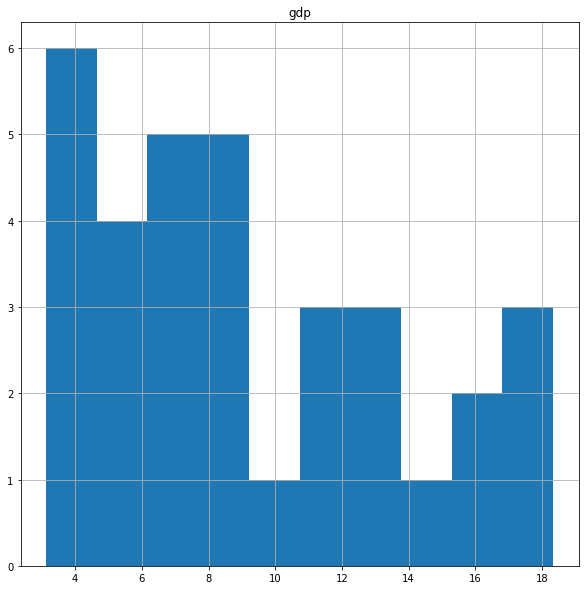

In [22]:
y.hist(figsize=(10,10))
plt.show()

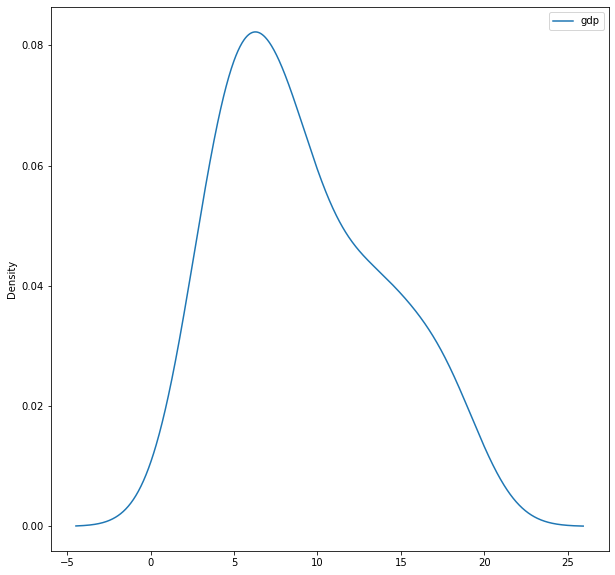

In [23]:
y.plot(kind='kde', figsize=(10,10))
plt.show()

## Box and Whisker Plots by Interval (for GDP does not work)

### Years

In [23]:
groups = series.groupby(pd.Grouper(freq='Y'))
years = pd.DataFrame()
for name, group in groups:
#     print(name.year)
#     print(np.reshape(group.values, (-1,)))
#     print(name.year)
    years[name.year] = np.reshape(group.values, (-1,))
    
# years.plot(kind='boxplot', subplots=True, legend=False, figsize=(15, 20))
plt.figure(figsize=(10,5))
years.boxplot()
plt.show()

NameError: name 'series' is not defined

### Months

In [24]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))

months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)


plt.figure(figsize=(10,5))
months.boxplot()
plt.show()

NameError: name 'series' is not defined

### Box-Cox Transformed Dataset

Lambda:	0.09758693416453605


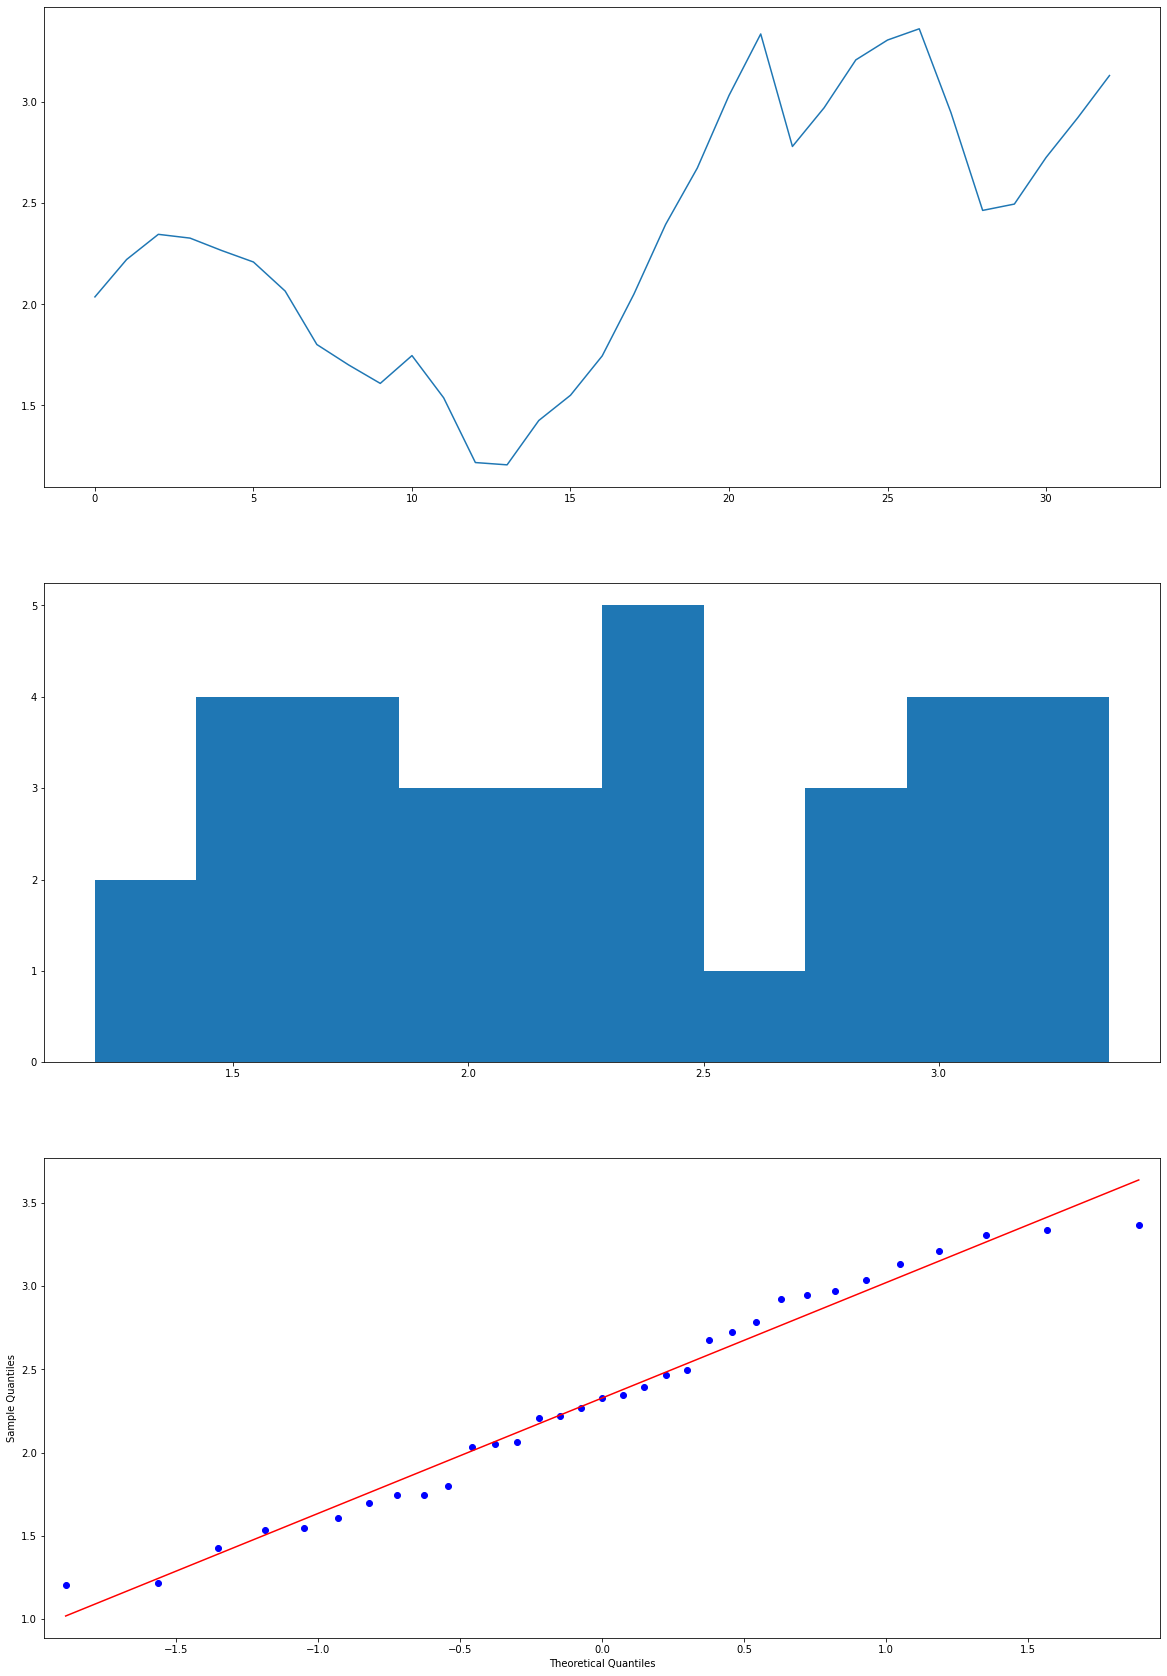

In [24]:
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot

X = y.gdp
transformaed, lam = boxcox(X)

print(f'Lambda:\t{lam}')

plt.figure(figsize=(20,30))
plt.subplot(311)
plt.plot(transformaed)
plt.subplot(312)
plt.hist(transformaed)
#q-q plot
plt.subplot(313)
qqplot(transformaed, line='r', ax=plt.gca())
plt.show()

In [25]:
def show_plots(y):
    sample = pd.Series(y)
#     plt.subplot(311)
#     plt.figure(figsize=(20,6))
    plt.title('Sample')
    plt.xlabel('k')
    plt.ylabel('y')
    plt.plot(sample, marker='o')
    plt.grid(True)
    

#     plt.subplot(312)
    plot_acf(sample, lags=lags);
    
#     plt.subplot(313)
    plot_pacf(sample, lags=lags);
    
    plt.show()

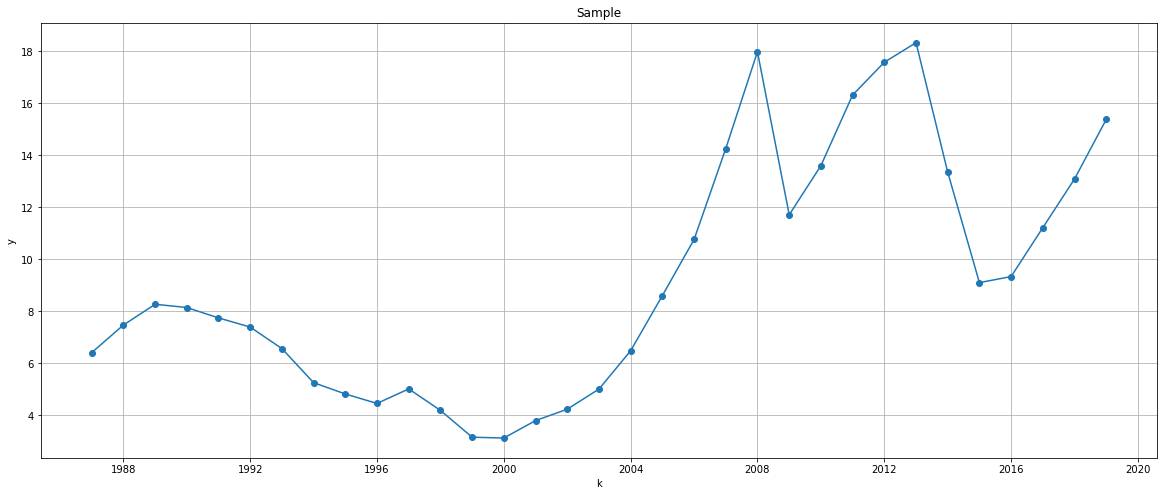

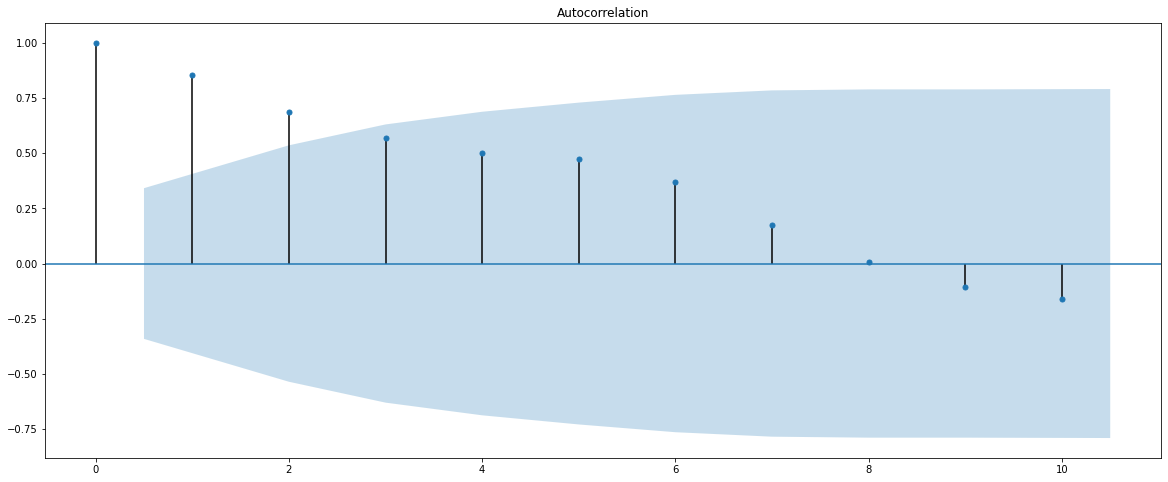

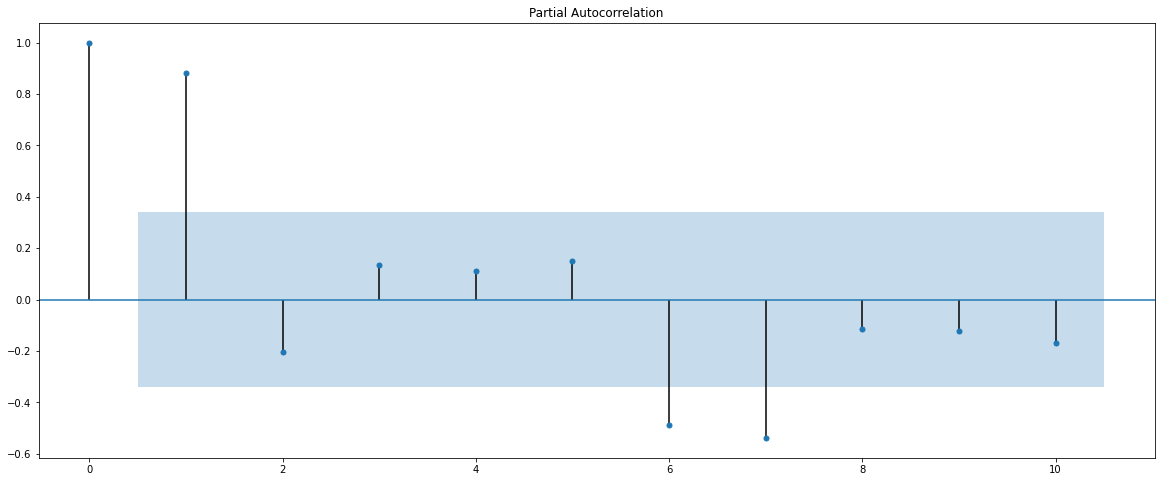

In [26]:
lags=10
show_plots(y.gdp)

## Preparing data 


In [28]:
## Preparing data 
p = 2
q = 7


In [100]:
import seaborn as sns

def barplot(data, title):
#     fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=data['feature'], y=data['value'])
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

In [49]:
window = 2

df_temp = pd.DataFrame()

for i in range(1,p+1):
    df_temp[f'y-{i}'] = y['gdp'].shift(i)

for i in range(2,window + 1):
    df_temp[f'window_mean_{i}'] = y['gdp'].rolling(window=i).mean()
    df_temp[f'window_std_{i}'] = y['gdp'].rolling(window=i).std()
    
df_temp['value'] = y.gdp
df_temp.dropna()
# shifted_1 = y.shift(1)
# pd.concat([y, shifted_1], axis=1)

,y-1,y-2,window_mean_2,window_std_2,value
date,,,,,
1989-01-01,7.47035179,6.40876940,7.87063395,0.56608446,8.27091611
1990-01-01,8.27091611,7.47035179,8.20830399,0.08854691,8.14569187
1991-01-01,8.14569187,8.27091611,7.94607399,0.28230231,7.74645611
1992-01-01,7.74645611,8.14569187,7.57033982,0.24906605,7.39422353
1993-01-01,7.39422353,7.74645611,6.97953976,0.58645141,6.56485599
1994-01-01,6.56485599,7.39422353,5.90990575,0.92623951,5.25495551
1995-01-01,5.25495551,6.56485599,5.03817117,0.30657937,4.82138682
1996-01-01,4.82138682,5.25495551,4.63859730,0.25850341,4.45580778
1997-01-01,4.45580778,4.82138682,4.73542388,0.39543688,5.01503998


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.preprocessing import PolynomialFeatures


class DiffData(BaseEstimator, TransformerMixin):
    
    def __init__(self, diff_model=0, box_cox=False, ln=False):
        self.diff_model = diff_model
        self.box_cox = box_cox
        self.ln = ln
        
    def fit(self, X, y=None):
        
        index = X.index
        y_value = X['gdp'].values
                
#         print(X_copy)
        if self.box_cox:
            transformed, self.lmbd = boxcox(y_value)   

            
        if not self.box_cox and self.ln:
            transformed = np.log(y_value)
            
        transformed = pd.DataFrame({f'value' : y_value}, index=index)             
        
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        
        index = X.index
        y_value = X['gdp'].values
        
        if self.box_cox:
            transformed  = boxcox(y_value, lmbda=self.lmbd)
        
        if not self.box_cox and self.ln:
            transformed = np.log(y_value)
        
        transformed = pd.DataFrame({f'value' : y_value}, index=index)
        
#         transformed =  (transformed - transformed.shift(self.diff_model)).dropna()
        if self.diff_model:
            transformed =  transformed - transformed.shift(self.diff_model)
        
        
        return transformed
    
class PrepareData(BaseEstimator, TransformerMixin):
    def __init__(self, lags=0, window=2):
#         self.box_cox = box_cox
        self.lags = lags
        self.window = 2
#         self.diff = diff_model
        
    def fit(self, X, y=None):
#         X_copy = X.copy()
        
#         transformed = pd.DataFrame()
        
#         if self.box_Cox:
#             transformed, self.lmbd = boxcox(X_copy)            
        
#         transformed =  transformed - transformed.shift(self.diff_model)

        
#         for i in range(1, self.lags + 1):
#             transformed[f'y-{i}'] = transformed['value'].shift(i)

#         for i in range(2, self.window + 1):
#             transformed[f'window_mean_{i}'] = transformed['value'].rolling(window=i).mean()
#             transformed[f'window_std_{i}'] = transformed['value'].rolling(window=i).std()
        
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        index = X_copy.index
        y_value = X['value'].values
        
        df_temp = pd.DataFrame({'value':y_value}, index=index)
        
        transformed = pd.DataFrame()
        
        for i in range(1, self.lags + 1):
            transformed[f'y-{i}'] = df_temp['value'].shift(i)

        for i in range(2, self.window + 1):
            transformed[f'window_mean_{i}'] = df_temp['value'].rolling(window=i).mean()
            transformed[f'window_std_{i}'] = df_temp['value'].rolling(window=i).std()
        
        transformed['value'] = y_value
        return transformed.dropna()
    

# prepera = Pipeline([('diff_box_cox', DiffData(diff_model=1, box_cox=True)), 
#                 ('prepare',PrepareData(lags=2, window=2))])

# prepera.fit(y, y)

In [108]:
data = prepera.transform(y)
data

,y-1,y-2,window_mean_2,window_std_2,value
date,,,,,
1990-01-01,0.80056432,1.06158239,0.33767004,0.65463137,-0.12522424
1991-01-01,-0.12522424,0.80056432,-0.26223000,0.19375540,-0.39923575
1992-01-01,-0.39923575,-0.12522424,-0.37573417,0.03323626,-0.35223258
1993-01-01,-0.35223258,-0.39923575,-0.59080006,0.33738537,-0.82936754
1994-01-01,-0.82936754,-0.35223258,-1.06963401,0.33978810,-1.30990048
1995-01-01,-1.30990048,-0.82936754,-0.87173459,0.61966014,-0.43356870
1996-01-01,-0.43356870,-1.30990048,-0.39957387,0.04807595,-0.36557904
1997-01-01,-0.36557904,-0.43356870,0.09682658,0.65394029,0.55923220
1998-01-01,0.55923220,-0.36557904,-0.13374182,0.98001325,-0.82671583


## Fiting Models

In [57]:
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, SGDRegressor, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

from xgboost import XGBRegressor, XGBRFRegressor

from modules import define_metrics, get_score_for_model

In [148]:
def show_pred(y_train, y_test, y, title):
    y_train_copy = pd.Series(y_train, index=y.index[:len(y_train)])
    y_test_copy = pd.Series(y_test, index=y.index[-len(y_test):])
    
#     print(y_test_copy)
#     print(f'y_train_copy shape:\t{y_train_copy.shape}')
#     print(f'y_test_copy shape:\t{y_test_copy.shape}')
#     print(f'y shape:\t{y.shape}')
    
    plt.plot(y_train_copy, label='y_train_predicted')
    plt.plot(y_test_copy, label='y_test_predicted')
    plt.plot(y, label='y_real')
    plt.title(title)
    plt.legend()
    plt.show()


## Without preaparations (diff and ln)

In [41]:
pipeline_repare_without = Pipeline([('diff_box_cox', DiffData(diff_model=0, box_cox=False)), 
                ('prepare',PrepareData(lags=2, window=2))])

pipeline_repare_without.fit(y, y)

data_prepare_without = pipeline_repare_without.transform(y)
data_prepare_without

,y-1,y-2,window_mean_2,window_std_2,value
date,,,,,
1989-01-01,7.47035179,6.40876940,7.87063395,0.56608446,8.27091611
1990-01-01,8.27091611,7.47035179,8.20830399,0.08854691,8.14569187
1991-01-01,8.14569187,8.27091611,7.94607399,0.28230231,7.74645611
1992-01-01,7.74645611,8.14569187,7.57033982,0.24906605,7.39422353
1993-01-01,7.39422353,7.74645611,6.97953976,0.58645141,6.56485599
1994-01-01,6.56485599,7.39422353,5.90990575,0.92623951,5.25495551
1995-01-01,5.25495551,6.56485599,5.03817117,0.30657937,4.82138682
1996-01-01,4.82138682,5.25495551,4.63859730,0.25850341,4.45580778
1997-01-01,4.45580778,4.82138682,4.73542388,0.39543688,5.01503998


In [140]:
features = data_prepare_without.columns[:-1]

X = data_prepare_without.drop(['value'], axis=1)
y_real = data_prepare_without['value']

count_test = 3
X_train = X.iloc[:-count_test, :]
y_real_train = y_real.iloc[:-count_test]

X_test = X.iloc[-count_test:, :]
y_real_test = y_real.iloc[-count_test:]

print(f'X_train shape:\t{X_train.shape}')
print(f'y_real_train shape:\t{y_real_train.shape}')

print()
print(f'X_test shape:\t{X_test.shape}')
print(f'y_real_test shape:\t{y_real_test.shape}')

X_train shape:	(28, 4)
y_real_train shape:	(28,)

X_test shape:	(3, 4)
y_real_test shape:	(3,)


In [48]:
%%time
models = []

models.append(('LinearRegression', LinearRegression()))
# models.append(('Lasso', Lasso()))
# models.append(('Ridge', Ridge()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=2)))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))

models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))

# models.append(('LinearSVR', LinearSVR()))
# models.append(('XGBRegressor', XGBRegressor()))
# models.append(('XGBRFRegressor', XGBRFRegressor()))
# models.append(('SVR', SVR()))

box_plot, df_means = get_score_for_model(models, X_train, y_real_train, n_splits=10,scoring='neg_mean_absolute_error', print_res=True)

LinearRegression: -3.611925573447176e-15 (2.3575333154253586e-15)
BayesianRidge: -1.0162432206861638e-08 (6.558194818414437e-09)
KNeighborsRegressor: -1.3287351699356915 (0.8814771842718188)
DecisionTreeRegressor: -1.6500608941593278 (0.6240729757472665)
GradientBoostingRegressor: -1.3326757604754256 (0.7923411444285928)
RandomForestRegressor: -1.392062833961234 (0.6928350472567165)
CPU times: user 181 ms, sys: 85.6 ms, total: 267 ms
Wall time: 1.42 s


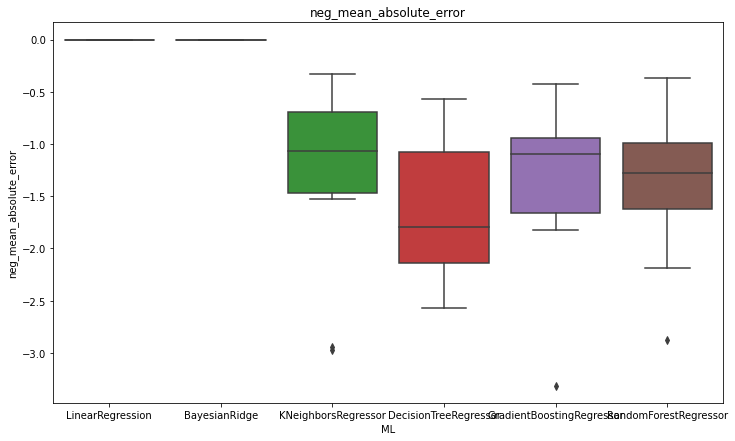

In [49]:
plt.figure(figsize=(12,7))
plt.title("neg_mean_absolute_error")
sns.boxplot(data = box_plot, x = box_plot.columns[1],y=box_plot.columns[0]);

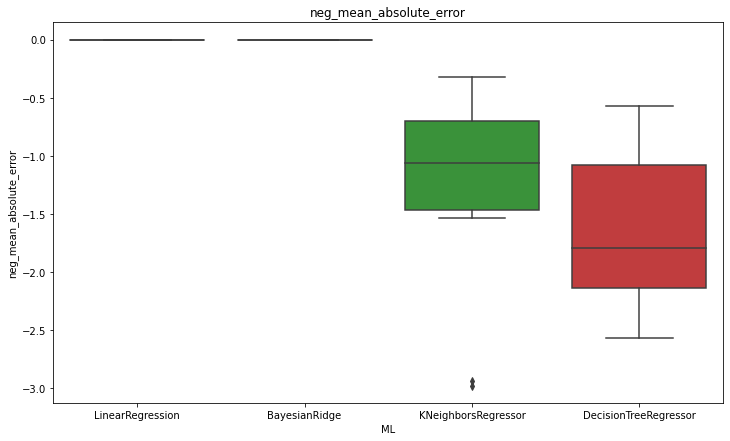

In [50]:

box_plot_new = box_plot.copy()
# box_plot_new = box_plot_new[box_plot_new['ML'] != 'Lasso']
box_plot_new = box_plot_new[box_plot_new['ML'] != 'RandomForestRegressor']
box_plot_new = box_plot_new[box_plot_new['ML'] != 'GradientBoostingRegressor']
# box_plot_new = box_plot_new[box_plot_new['ML'] != 'Lasso']
# box_plot_new = box_plot_new[box_plot_new['ML'] != 'KNeighborsRegressor']




plt.figure(figsize=(12,7))
plt.title("neg_mean_absolute_error")
sns.boxplot(data = box_plot_new, x = box_plot_new.columns[1],y=box_plot_new.columns[0]);

## Fiting separate models

## DecisionTreeRegressor

In [166]:
%%time
decTree = DecisionTreeRegressor()

grid = {
    'max_features': [None, 'sqrt', 'log2', 'max_features'],
    'criterion': ['mse', 'mae'],
    'max_depth' : np.linspace(1,5, dtype=int)
}

n_splits = 3
clf1 = GridSearchCV(decTree, grid, n_jobs=-1,
                  cv=KFold(n_splits=n_splits, shuffle=True),
                  scoring='neg_mean_absolute_error',
                  verbose=5, refit=True)

clf1.fit(X_train, y_real_train)

print()
print(clf1.best_params_)
print(clf1.best_score_)
print(clf1.best_estimator_)

name='DecisionTreeRegressor'
model = clf1
score_model = define_metrics(model, X_train, X_test, y_real_train, y_real_test, name)
score_model

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s



{'criterion': 'mse', 'max_depth': 4, 'max_features': None}
-1.2665510256896635
DecisionTreeRegressor(max_depth=4)
CPU times: user 903 ms, sys: 15.4 ms, total: 919 ms
Wall time: 1 s


[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    1.0s finished


,name,r2,MAPE,RMSE,durbin_watson,theil_index,ex_var
0,DecisionTreeRegressor_train,0.99707255,3.09783086,2.08067694,2.49957524,0.05355659,0.99707255
0,DecisionTreeRegressor_test,0.28069693,10.94790893,nan,1.61576882,nan,0.28112809


In [167]:
%%time
decTree_sep = clf1.best_estimator_ # DecisionTreeRegressor(criterion='mae', max_depth=4)
# decTree_sep.fit(X_train, y_real_train)

y_train_predict_decTree = decTree_sep.predict(X_train)
y_test_predict_decTree = decTree_sep.predict(X_test)

CPU times: user 2.92 ms, sys: 147 µs, total: 3.07 ms
Wall time: 2.88 ms


### Show predictions

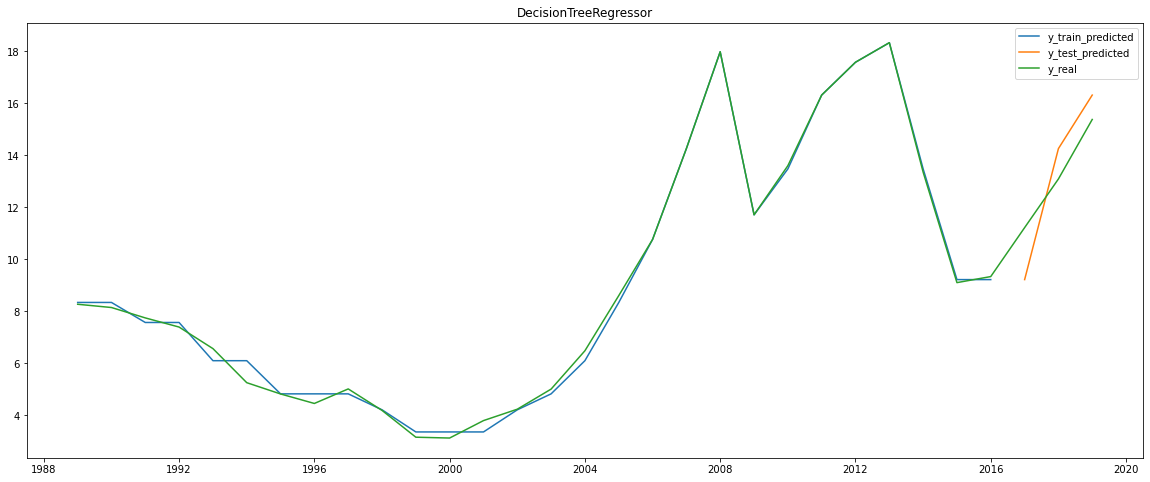

In [168]:
show_pred(y_train=y_train_predict_decTree,
         y_test=y_test_predict_decTree,
         y=y_real,
         title=name)

### Show Features importance

In [169]:
importances = decTree_sep.feature_importances_
feat_imp = dict((value, name) for value, name in zip(features, importances)) 

feat_imp = sorted(feat_imp.items(), key=lambda x: np.abs(x[1]), reverse=True)
feat_imp = pd.DataFrame(feat_imp, columns=['feature', 'value'])



In [170]:
feat_imp

,feature,value
0,window_mean_2,0.96791481
1,y-2,0.01273436
2,y-1,0.01143247
3,window_std_2,0.00791836


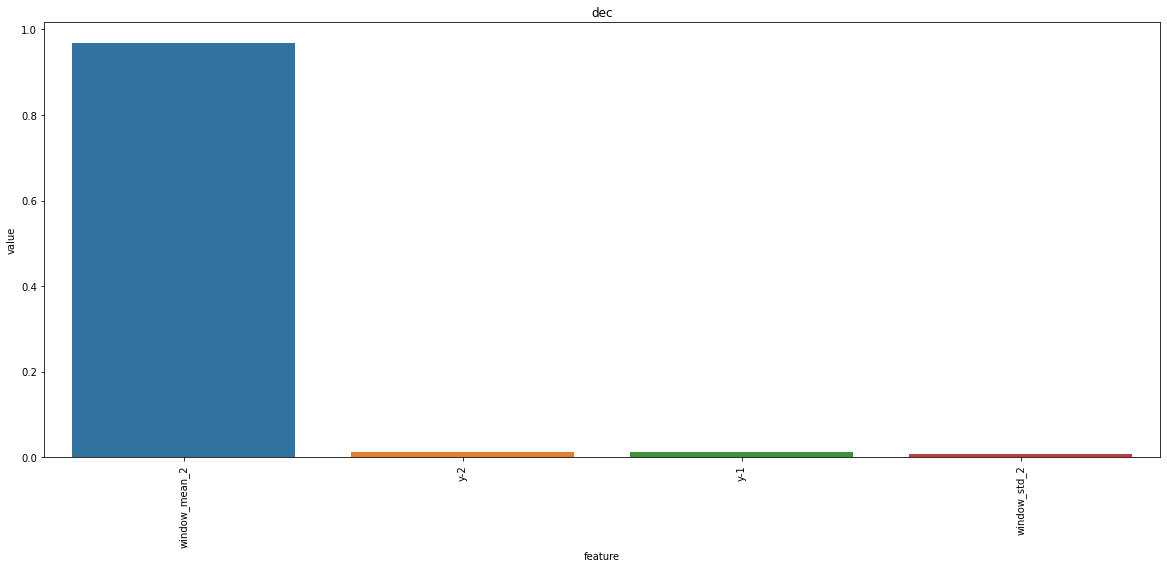

In [171]:
barplot(feat_imp, title='dec')

## LinearRegression

In [173]:
%%time
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_real_train)

y_train_predict_linReg = lin_reg.predict(X_train)
y_test_predict_linReg = lin_reg.predict(X_test)
name = 'LinearRegression'

CPU times: user 7.49 ms, sys: 0 ns, total: 7.49 ms
Wall time: 7.19 ms


### Show predictions

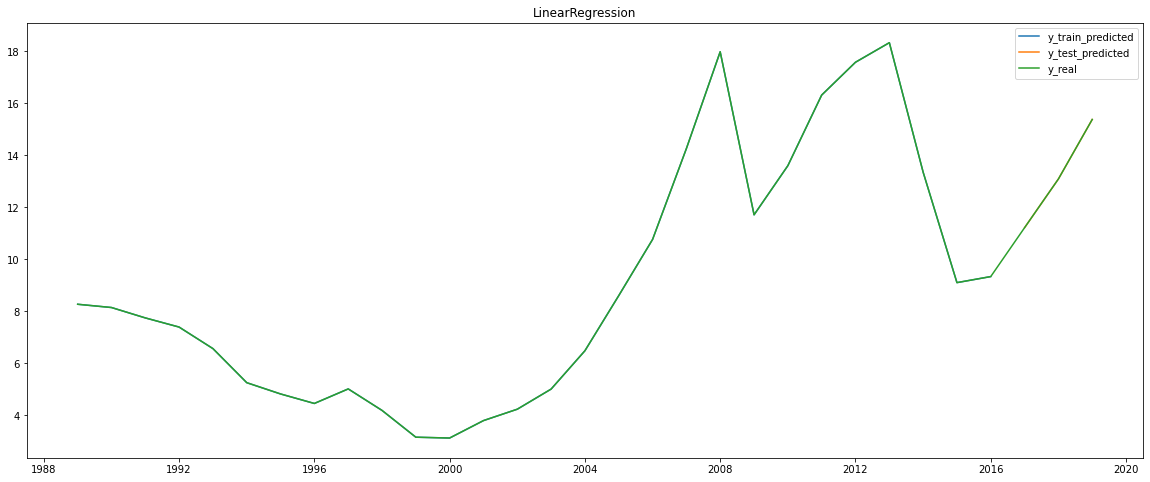

In [174]:
show_pred(y_train=y_train_predict_linReg,
         y_test=y_test_predict_linReg,
         y=y_real,
         title=name)

### Show Features importance

In [182]:
importances = lin_reg.coef_
feat_imp = dict((value, name) for value, name in zip(features, importances)) 

feat_imp = sorted(feat_imp.items(), key=lambda x: np.abs(x[1]), reverse=True)
feat_imp = pd.DataFrame(feat_imp, columns=['feature', 'value'])



In [183]:
feat_imp

,feature,value
0,window_mean_2,2.00000000
1,y-1,-1.00000000
2,window_std_2,-0.00000000
3,y-2,-0.00000000


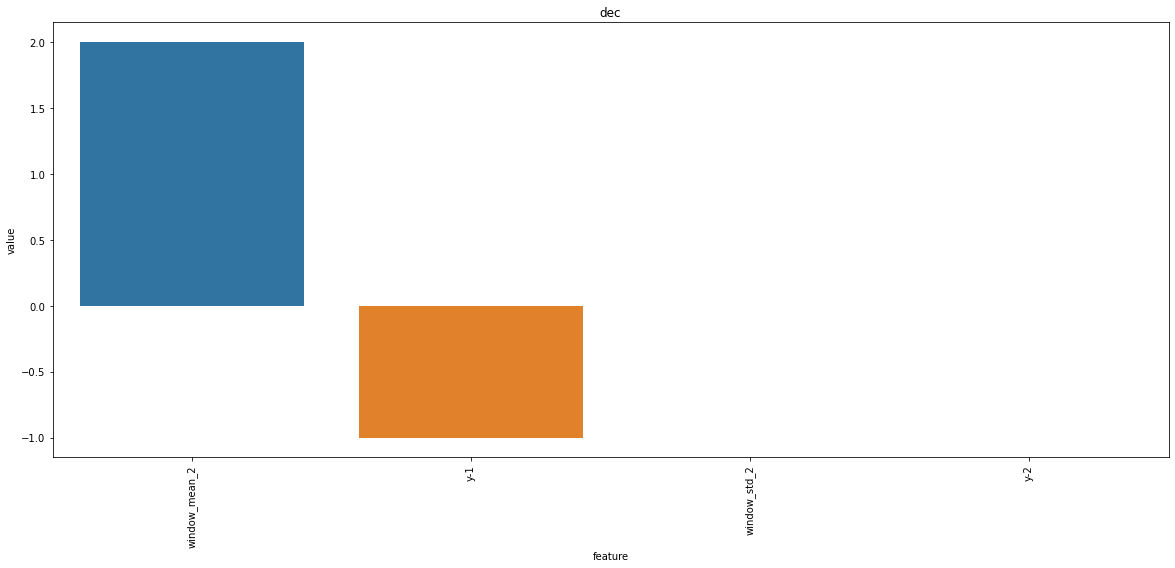

In [184]:
barplot(feat_imp, title='dec')

## KNeighborsRegressor

In [188]:
%%time
knn = KNeighborsRegressor()
grid = {'n_neighbors': np.linspace(1,5, dtype=int),
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}

n_splits = 10
clf2 = GridSearchCV(knn, grid, n_jobs=-1,
                  cv=KFold(n_splits=n_splits, shuffle=True),
                  scoring='neg_mean_absolute_error',
                  verbose=5, refit=True)

clf2.fit(X_train, y_real_train)

print()
print(clf2.best_params_)
print(clf2.best_score_)
print(clf2.best_estimator_)

name='KNeighborsRegressor'
model = clf2
score_model = define_metrics(model, X_train, X_test, y_real_train, y_real_test, name)
score_model

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3678 tasks      | elapsed:    3.5s



{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
-1.182419692673897
KNeighborsRegressor(algorithm='ball_tree')
CPU times: user 2.52 s, sys: 118 ms, total: 2.64 s
Wall time: 3.75 s


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    3.7s finished


,name,r2,MAPE,RMSE,durbin_watson,theil_index,ex_var
0,DecisionTreeRegressor_train,0.90547702,12.53478457,0.87459565,2.01415562,0.03532265,0.90784855
0,DecisionTreeRegressor_test,0.69764680,6.06680229,nan,1.48165551,nan,0.73328857


In [194]:
%%time
knn_sep = clf2.best_estimator_ # DecisionTreeRegressor(criterion='mae', max_depth=4)
# decTree_sep.fit(X_train, y_real_train)

y_train_predict_knn= knn_sep.predict(X_train)
y_test_predict_knn = knn_sep.predict(X_test)

CPU times: user 3.59 ms, sys: 0 ns, total: 3.59 ms
Wall time: 3.09 ms


### Show predictions

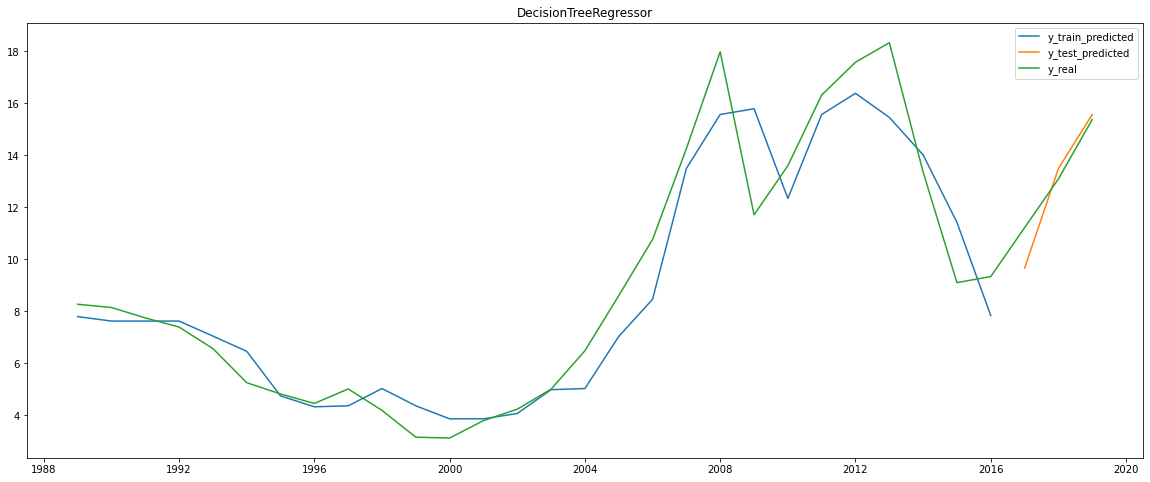

In [195]:
show_pred(y_train=y_train_predict_knn,
         y_test=y_test_predict_knn,
         y=y_real,
         title=name)

## BayesianRidge

In [201]:
%%time
bayes = BayesianRidge()
grid = {'n_iter': np.linspace(100,500, 5,dtype=int)
}

n_splits = 10
clf3 = GridSearchCV(bayes, grid, n_jobs=-1,
                  cv=KFold(n_splits=n_splits, shuffle=True),
                  scoring='neg_mean_absolute_error',
                  verbose=5, refit=True)

clf3.fit(X_train, y_real_train)

print()
print(clf3.best_params_)
print(clf3.best_score_)
print(clf3.best_estimator_)

name='BayesianRidge'
model = clf3
score_model = define_metrics(model, X_train, X_test, y_real_train, y_real_test, name)
score_model

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



{'n_iter': 100}
-9.702224520088028e-09
BayesianRidge(n_iter=100)
CPU times: user 219 ms, sys: 90.3 ms, total: 309 ms
Wall time: 926 ms


[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


,name,r2,MAPE,RMSE,durbin_watson,theil_index,ex_var
0,BayesianRidge_train,1.00000000,0.00000007,0.00000000,1.73901461,0.00000000,1.00000000
0,BayesianRidge_test,1.00000000,0.00000005,nan,0.13050088,nan,1.00000000


In [202]:
%%time
bayes_sep = clf3.best_estimator_ # DecisionTreeRegressor(criterion='mae', max_depth=4)
# decTree_sep.fit(X_train, y_real_train)

y_train_predict_bayes = bayes_sep.predict(X_train)
y_test_predict_bayes = bayes_sep.predict(X_test)

CPU times: user 2.09 ms, sys: 110 µs, total: 2.2 ms
Wall time: 2.21 ms


### Show predictions

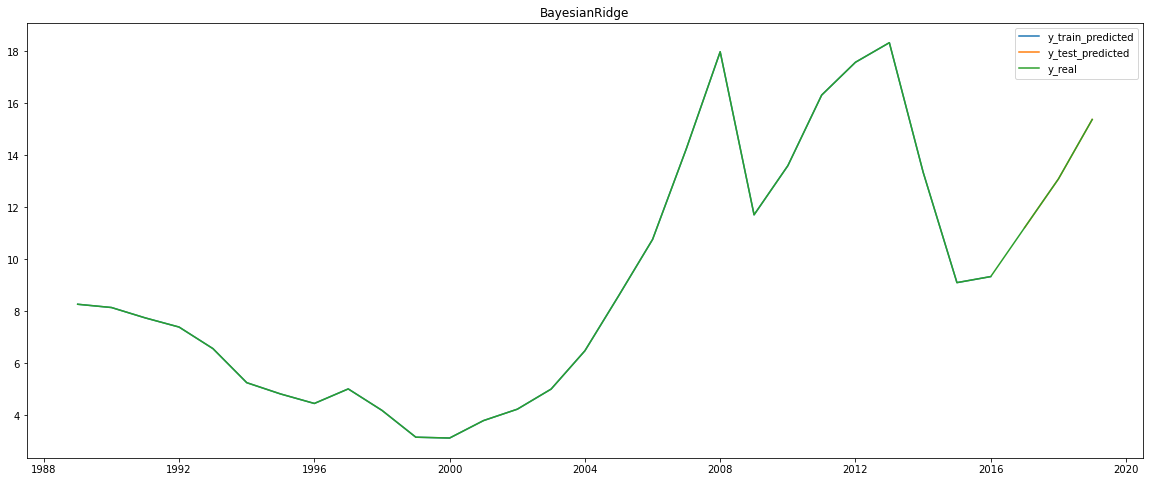

In [204]:
show_pred(y_train=y_train_predict_bayes,
         y_test=y_test_predict_bayes,
         y=y_real,
         title=name)

### Show Features importance

In [206]:
importances = bayes_sep.coef_
feat_imp = dict((value, name) for value, name in zip(features, importances)) 

feat_imp = sorted(feat_imp.items(), key=lambda x: np.abs(x[1]), reverse=True)
feat_imp = pd.DataFrame(feat_imp, columns=['feature', 'value'])



In [207]:
feat_imp

,feature,value
0,window_mean_2,1.99999999
1,y-1,-0.99999999
2,window_std_2,-0.00000000
3,y-2,-0.00000000


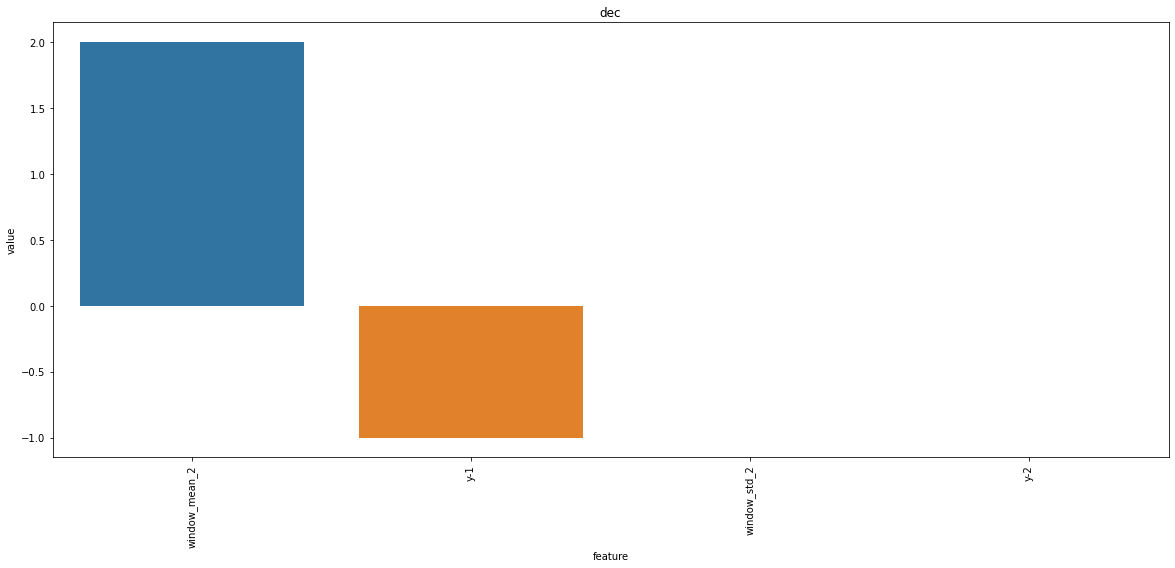

In [208]:
barplot(feat_imp, title='dec')